#Week 3 - Homework

## DataSet description



1.   **age** - *Age in years*
2.   **sex** - *1 = male; 0 = female*
3.   **cp** - *chest pain type*
4.   **trestbps** - *resting blood pressure (in mm Hg on admission to the hospital)*
5.   **chol** - *serum cholestoral in mg/dl*
6.   **fbs** - *(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)*
7.   **restecg** - *resting electrocardiographic results*
8.   **thalach** - *maximum heart rate achieved*
9.   **exang** - *exercise induced angina (1 = yes; 0 = no)*
10.   **oldpeak** - *ST depression induced by exercise relative to rest*
11.   **slope** - *the slope of the peak exercise ST segment*
12.   **ca** - *number of major vessels (0-3) colored by flourosopy*
13.   **thal** - *3 = normal; 6 = fixed defect; 7 = reversable defect*
14.   **target** - *have disease or not (1=yes, 0=no)*

chol - serum cholestoral in mg/dl 
fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
restecg - resting electrocardiographic results 
thalach - maximum heart rate achieved 
exang - exercise induced angina (1 = yes; 0 = no) 
oldpeak - ST depression induced by exercise relative to rest 
slope - the slope of the peak exercise ST segment 
ca - number of major vessels (0-3) colored by flourosopy 
thal - 3 = normal; 6 = fixed defect; 7 = reversable defect 
target - have disease or not (1=yes, 0=no)

## Load Extensions

In [129]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn import metrics
import itertools
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

## Load Data

In [130]:
data = pandas.read_csv("Heart_Disease_UCI.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [131]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Run linear regression on multiple features (one at a time).

### Correlation to find important features

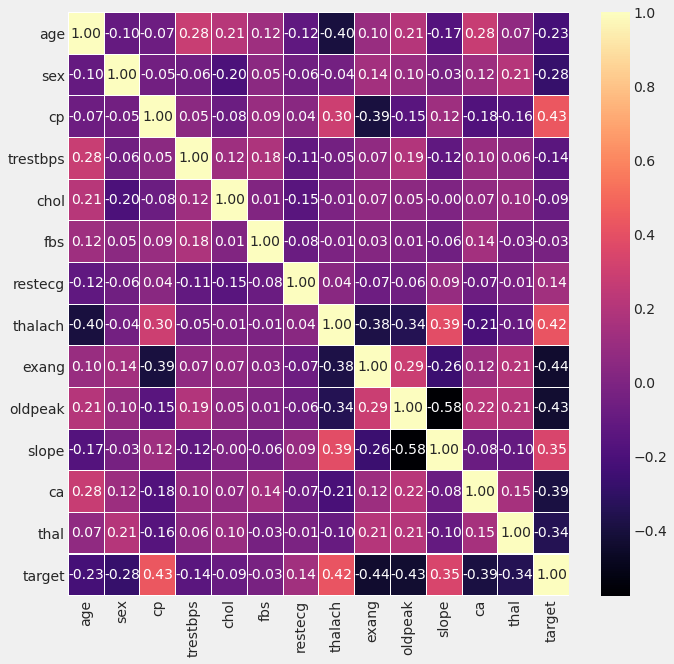

In [132]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

Analyzing the correlation using a heat map, we can conclude that **cp (chest pain)** , **thalach (maximum heart rate)** and **slope (slope of the peak exercise** are representative among the other features 

### Heart disease ratio

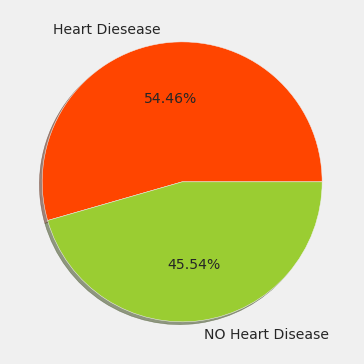

In [133]:
heart_disease_count = len(data[data['target']==1])
no_heart_disease_count = len(data[data['target']==0])
labels = ["Heart Diesease", "NO Heart Disease"]
sizes = [heart_disease_count, no_heart_disease_count]
colors = ['orangered', 'yellowgreen']
plt.figure(figsize=(8,6))

plt.pie(sizes,labels=labels, colors=colors, autopct='%1.2f%%', shadow=True)
plt.show()

### Calculate & Plot Linear Regression method

In [134]:
def plot_linear_regression(x_name, y_name, XName, YName, x_range):
  linearRegression = LinearRegression()
  xAxis = data[x_name]
  yAxis = data[y_name]

  x = np.array(list(map(lambda i : [i], xAxis)))
  linearRegression.fit(x, yAxis)

  xPlot = x_range
  yPlot = linearRegression.predict(np.array(list(map(lambda i : [i], xPlot))))

  line = plt.plot(xAxis,yAxis,'o')
  plt.setp(line, linewidth = 3.0)
  plt.plot(xPlot,yPlot)
  plt.xlabel(XName)
  plt.ylabel(YName)

### OldPeak over age distribution

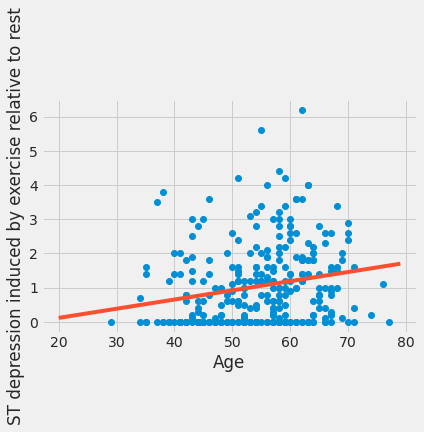

In [135]:
plot_linear_regression('age', 'oldpeak', 'Age', 'ST depression induced by exercise relative to rest', range(20,80))

### Thalach over age distribution

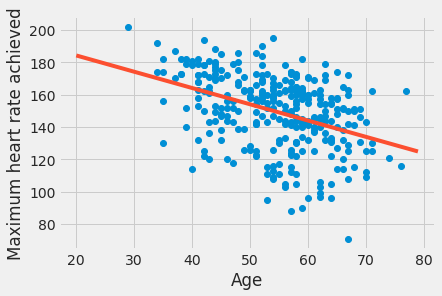

In [136]:
plot_linear_regression('age', 'thalach', 'Age', 'Maximum heart rate achieved', range(20,80))

### Chol over age distribution

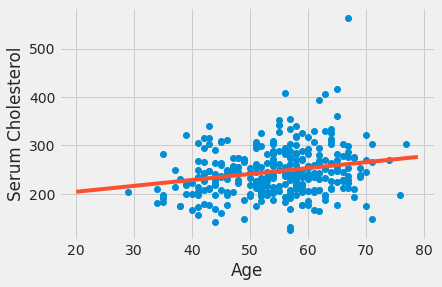

In [137]:
plot_linear_regression('age', 'chol', 'Age', 'Serum Cholesterol', range(20,80))

### Trestbps over age distribution

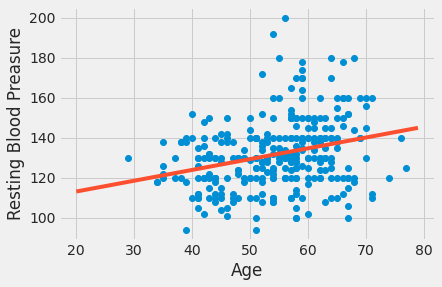

In [138]:
plot_linear_regression('age', 'trestbps', 'Age', 'Resting Blood Preasure', range(20,80))

### Trestbps over oldpeak

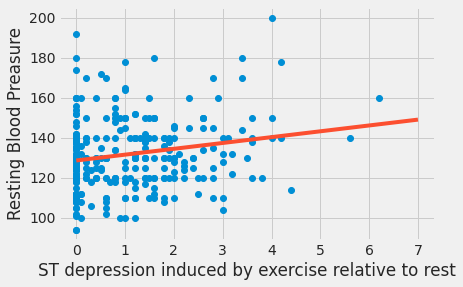

In [139]:
plot_linear_regression('oldpeak', 'trestbps', 'ST depression induced by exercise relative to rest', 'Resting Blood Preasure', range(0,8))

### Trestbps over thalach

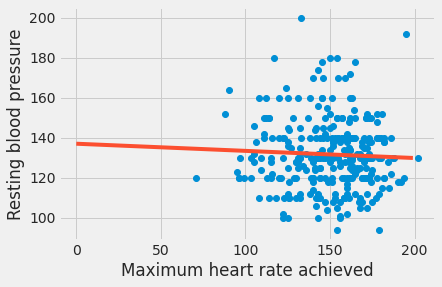

In [140]:
plot_linear_regression('thalach', 'trestbps', 'Maximum heart rate achieved','Resting blood pressure',  range(0,200))

### trestbps over chol

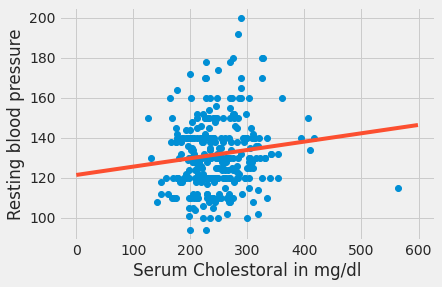

In [141]:
plot_linear_regression('chol', 'trestbps', 'Serum Cholestoral in mg/dl','Resting blood pressure',  range(0,600))

### Chol over oldPeak

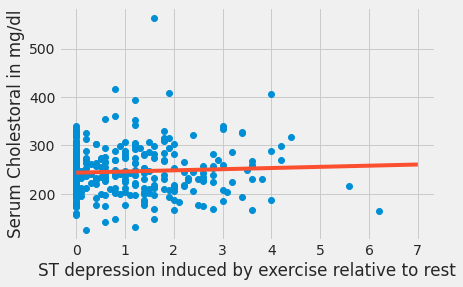

In [142]:
plot_linear_regression('oldpeak', 'chol','ST depression induced by exercise relative to rest', 'Serum Cholestoral in mg/dl', range(0,8))

### Thalach over oldPeak

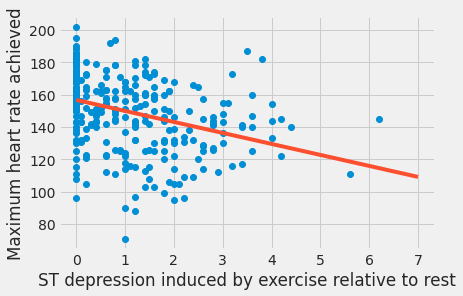

In [143]:
plot_linear_regression('oldpeak', 'thalach','ST depression induced by exercise relative to rest', 'Maximum heart rate achieved', range(0,8))

## Data Preparation

### Define input and output

In [144]:
X = data.drop('target', axis=1) #Input
y = data['target'] #Output

### Split data into training and testing sets

In [145]:
#Generate 70% of train input data & 30% of test input data.
#Generate 70% of train output data & 30% of test output data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

### Fit the model

In [146]:
rfmodel = RandomForestClassifier(random_state=42) #Use the same random_state as train_test_split 
rfmodel.fit(X_train, y_train)
lgrmodel = LogisticRegression(solver='saga', random_state=42, max_iter=5561)
lgrmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5561,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

### Make predictions

Make predictions and evaluate the prediction using the classification accuracy performance metric.

In [147]:
# Random forest
# make predictions
yhat = rfmodel.predict(X_test)
# evaluate predictions
acc = accuracy_score(y_test, yhat)
print('RF Accuracy: %.3f' % acc) # 

# Logistic regression
# make predictions
yhat = lgrmodel.predict(X_test)
# evaluate predictions
acc = accuracy_score(y_test, yhat)
print('LgR Accuracy: %.3f' % acc) # 

RF Accuracy: 0.824
LgR Accuracy: 0.868


After this result:  
```
# Random forest accuracy: 0.824
# Logistic regression accuracy: 0.868
```
we can conclude that removing the 'target' column from the dataset is safe to work with the most relevant features to feed the model.

## Data improvement

Dropping columns that has the absolute correlation with target lower than 0.05, fbs

In [148]:
X = data.drop(['fbs', 'target'], axis=1) # Drop uncorrelated data
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rfmodel = RandomForestClassifier(random_state=42)
rfmodel.fit(X_train, y_train)
lgrmodel = LogisticRegression(solver='saga', random_state=42, max_iter=5556)
lgrmodel.fit(X_train, y_train)

# Random forest
yhat = rfmodel.predict(X_test)
acc = accuracy_score(y_test, yhat)
print('RF Accuracy: %.3f' % acc)

# Logistic regression
yhat = lgrmodel.predict(X_test)
acc = accuracy_score(y_test, yhat)
print('LgR Accuracy: %.3f' % acc)

RF Accuracy: 0.835
LgR Accuracy: 0.868


We find that the accuracy of random forest model increased and the epoch needed for logistic regression model to achieve the same accuracy is lower.

Tested dropping other columns but not really getting any better.

Tested with different RNG seeds and it seems like logistic regression always beats random forest classifier.


## Data Enrichment

### Apply GMM clustering on the data

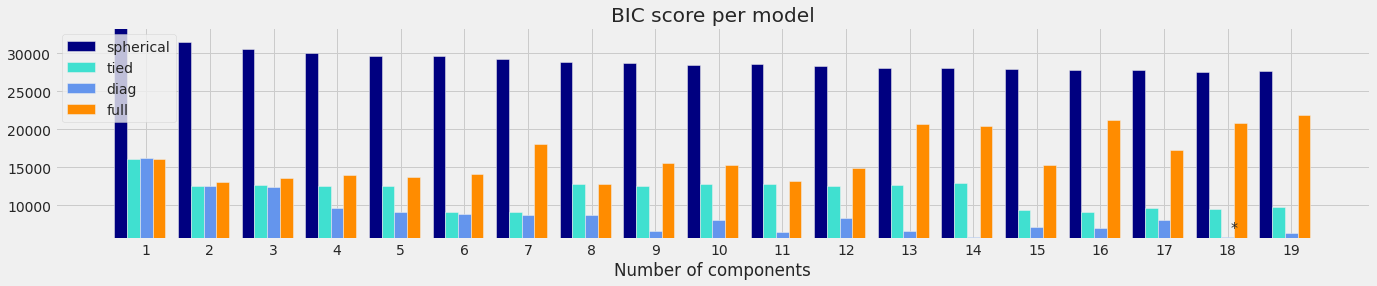

In [149]:
X = data.drop('target', axis=1)

lowest_bic = np.inf
bic = []
K = range(1, 20)
cv_types = ['spherical', 'tied', 'diag', 'full']


for cv_type in cv_types:
  for k in K:
    gmm = GaussianMixture(n_components=k, covariance_type=cv_type, max_iter=150)
    gmm.fit(X)
    bic.append(gmm.bic(X))
    if bic[-1] < lowest_bic:
      lowest_bic = bic[-1]
      best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue', 'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(21, 8))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(K) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(K):
                                  (i + 1) * len(K)],
                        width=.2, color=color))
plt.xticks(K)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(K)) + .65 +\
    .2 * np.floor(bic.argmin() / len(K))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

Best combo: diag, 17 clusters

###Combine cluster information into dataset

In [150]:
labeled_data = pandas.DataFrame(data=clf.predict(X), columns=['Cluster'])
labeled_data = pandas.concat([data, labeled_data], axis=1)
labeled_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Cluster
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,5
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,9
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,10
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,6
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,16


### Classification

In [151]:
X = labeled_data.drop(['fbs', 'target'], axis=1)
y = labeled_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rfmodel = RandomForestClassifier(random_state=42)
rfmodel.fit(X_train, y_train)
lgrmodel = LogisticRegression(solver='saga', random_state=42, max_iter=5527)
lgrmodel.fit(X_train, y_train)

# Random forest
yhat = rfmodel.predict(X_test)
acc = accuracy_score(y_test, yhat)
print('RF Accuracy: %.3f' % acc)

# Logistic regression
yhat = lgrmodel.predict(X_test)
acc = accuracy_score(y_test, yhat)
print('LgR Accuracy: %.3f' % acc)

RF Accuracy: 0.802
LgR Accuracy: 0.868


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Giving clustering information increased accuracy for random forest model but only reduced the epoch needed to train logistic regression model.

## Latent Manifold

### Pre-process data

In [152]:
#The target field tells how many people have heart disease, so lets count how many have and how many do not have heart disease
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [153]:
#Check if there are null values
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [154]:
#Differentiate Categorical and Numerical Data

categorical_val = []
continous_val = []
for column in data.columns:
    print('==============================')
    print(f"{column} : {data[column].unique()}")
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

In [155]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [156]:
continous_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [157]:
#Convert categorical data

categorical_val.remove('target')
dataset = pandas.get_dummies(data, columns = categorical_val)

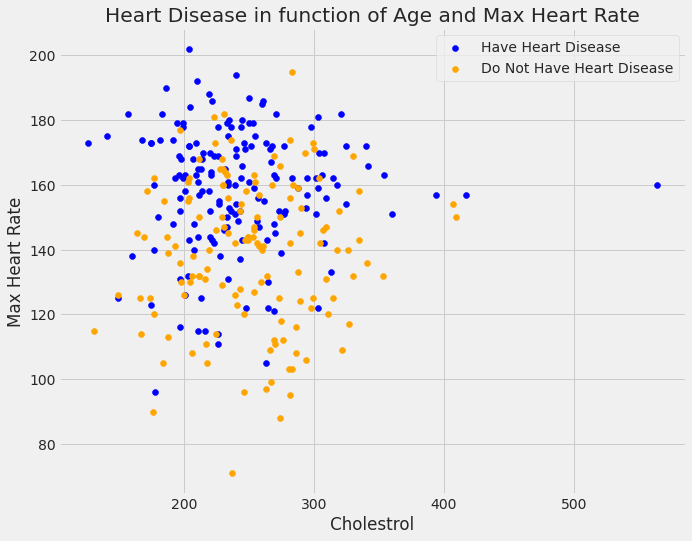

In [158]:
# Create another figure
plt.figure(figsize=(10, 8))

# People with Heart Disease 
plt.scatter(data.chol[data.target==1],
            data.thalach[data.target==1],
            c="blue")

# People that do not have Heart Disease
plt.scatter(data.chol[data.target==0],
            data.thalach[data.target==0],
            c="orange")

# Labe the scatter chart
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Cholestrol")
plt.ylabel("Max Heart Rate")
plt.legend(["Have Heart Disease", "Do Not Have Heart Disease"]);

### Method to plot SSE and Silhouette Score

In [159]:
def plot_cluster(df, max_loop=50):
    """
    Looking at the performance of various number of clusters using K-Means.
    Performance is evaluated by within cluster SSE and silhouette score.
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:]
    
    # robust scaling is used so that the centering and scaling statistics are therefore not influenced by a few number of very large marginal outliers as they are based on percentiles
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    
    sse_within_cluster = {}
    silhouette_score = {}
    
    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10, n_jobs=-1)
        kmeans.fit(X_rb)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)

    _ = plt.figure(figsize=(10,6))
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

### Evaluation using SSE and Silhouette Score

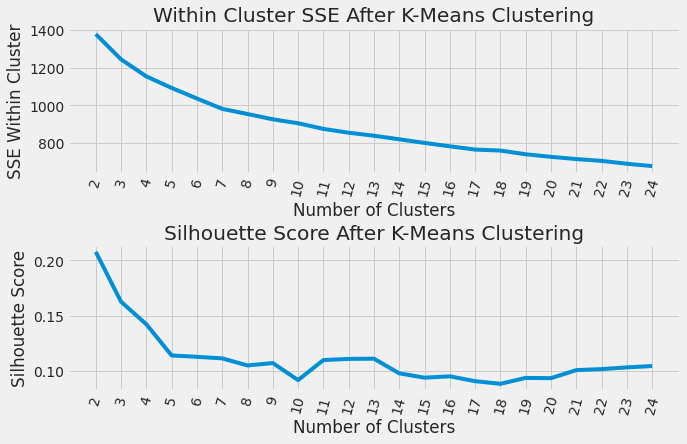

In [160]:
plot_cluster(data, max_loop=25)

Since there is a dip between 10 and 11 for next round we can use 10 clusters

**First Round** 

In [161]:
def apply_cluster(df, clusters=2):
    """
    Applying K-Means with the optimal number of clusters identified
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:]
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    kmeans = KMeans(n_clusters=clusters, random_state=10, n_init=10, n_jobs=-1)  
    kmeans.fit(X_rb) 
    score = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)
    df['cluster'] = kmeans.labels_
    sse_within_cluster = kmeans.inertia_
    
    print("clustering performance")
    print("-----------------------------------")
    print("silhouette score: " + str(score.round(2)))
    print("sse withing cluster: " + str(sse_within_cluster.round()))
    
    return df

In [162]:
first_trial = apply_cluster(data, clusters=10)

clustering performance
-----------------------------------
silhouette score: 0.09
sse withing cluster: 905.0


Based on the co-relation matrix used these parameters with higher correlation

In [163]:
cluster_perf_df = (
    first_trial
    .groupby('cluster')
    .agg({"cp":"mean", "thalach":"mean", "slope":"mean"})
    .sort_values('cp')
    .reset_index()
)

cluster_perf_df

,cluster,cp,thalach,slope
0,3,0.083333,120.583333,0.972222
1,0,0.100000,129.550000,1.200000
2,2,0.230769,132.038462,0.923077
3,4,0.958333,166.937500,1.937500
4,5,1.068966,159.482759,1.724138
5,8,1.194444,162.916667,1.638889
6,9,1.233333,160.866667,1.866667
7,7,1.258065,142.258065,1.451613
8,1,1.789474,146.263158,1.052632
9,6,1.857143,159.285714,0.642857


**Second Round**

In [164]:
# creating a dataframe that only consists of cluster `9`
agg_df3_sub = data.query("cluster == 9").reset_index(drop=True)

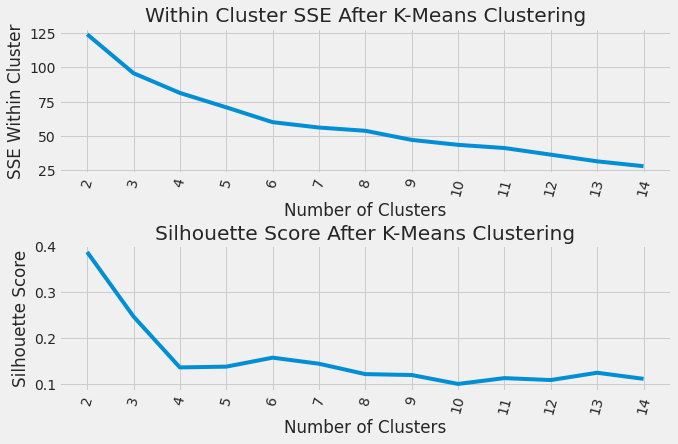

In [165]:
plot_cluster(agg_df3_sub, max_loop=15)

In the second round we will use 4 clusters based on the Silhouette Score

In [166]:
second_trial= apply_cluster(agg_df3_sub, clusters=4)

clustering performance
-----------------------------------
silhouette score: 0.14
sse withing cluster: 81.0


In [167]:
sub_cluster_perf_df = (
    second_trial
    .groupby('cluster')
    .agg({"cp":"mean", "thalach":"mean", "slope":"mean"})
    .sort_values('cp')
    .reset_index()
)

sub_cluster_perf_df

,cluster,cp,thalach,slope
0,1,1.076923,158.538462,1.923077
1,3,1.181818,169.545455,1.909091
2,2,1.600000,148.000000,1.800000
3,0,2.000000,160.000000,1.000000


**Work on the extra parameter to add improve accuracy**

Age factor in combination with other factors shows improvement in correlation
Reference: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4441402/

In [168]:

def get_transform_df(df_w_age):
    """
    Transforming dataframe to utilize age in combination with cp and thalach
    """
    df_cp = (
        df_w_age
        [['cp', 'cluster']]
        .pipe(lambda x: x.assign(type='cp'))
        .rename(columns={"cp": "rate"})
    )

    df_thalach = (
        df_w_age
        [['thalach', 'cluster']]
        .pipe(lambda x: x.assign(type='thalach'))
        .rename(columns={"thalach": "rate"})
    )

    df_age = (
        df_w_age
        [['age', 'cluster']]
    )

    df_transform = pandas.concat([df_cp, df_thalach], axis=0)

    return df_transform, df_age

In [169]:
sub_cluster_transform, sub_cluster_age = get_transform_df(second_trial)

In [170]:
def cluster_perf(transform_df, age_df):
    """
    Plotting boxplot of cluster performance
    """
    _  = plt.figure(figsize=(15,7))

    ax1 = plt.subplot(121)
    _ = sns.boxplot(x='cluster', y='rate', hue='type', data=transform_df)
    _ = plt.title("Distribution of Chest Pain and Max Heart Rate for each Cluster")

    ax2 = plt.subplot(122)
    _ =sns.boxplot(x='cluster', y='age', data=age_df, color='royalblue')
    _ = plt.title("Distribution of Age for each Cluster")

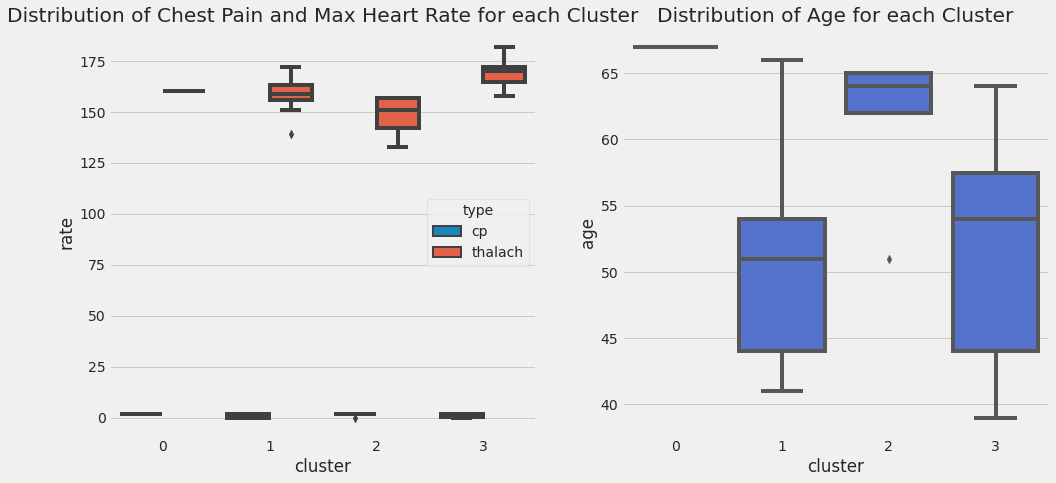

In [171]:
cluster_perf(sub_cluster_transform, sub_cluster_age)

**As can be seen based one Age in combination with Chest Pain and Max Heart Rate shows that Cluster number 3 shows better results.**

In [172]:
sub_cluster_perf_df = (
    second_trial
    .groupby('cluster')
    .agg({"cp":"mean", "thalach":"mean", "slope":"mean", "age":"mean"})
    .sort_values('cp')
    .reset_index()
)

sub_cluster_perf_df

,cluster,cp,thalach,slope,age
0,1,1.076923,158.538462,1.923077,50.846154
1,3,1.181818,169.545455,1.909091,51.909091
2,2,1.600000,148.000000,1.800000,61.400000
3,0,2.000000,160.000000,1.000000,67.000000


**Conclusion**

In the first iteration 10 clusters were used. In the second round of iteration 4 clusters were used which also improved the co-relation. Then a relative factor Age was introduced to make the other parameters more relevant. From this it was seen that cluster 3 performed well. 

## Use the manifold to add features to your data set and run regression or clustering based on those new features. How does this improve the interpretability of your model? How does it add value to your business case?

## References

https://pubmed.ncbi.nlm.nih.gov/7260962/

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4441402/

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5863635/
